# Soccer Mining League
## Predict result one league and one season

#### Data Mining PESC/COPPE/UFRJ
#### Required: Python 3.5, Numpy, Scikit-Learn, Matplotlib

In [30]:
import numpy as np

#Sklearn -- preprocessing 
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
#Plots
%matplotlib inline

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.cross_validation import cross_val_score

# Soccer Mining League Functions
from functions import *

## Reading dataset

#### Reading from file

In [2]:
trainTest = np.loadtxt("../dataset/formated_files/matchs_teams_germany_league_2015_2016_formated.csv",delimiter=",")

#### Recover output

In [3]:
outputs = trainTest[:,71]

## Preprocessing

#### Plot PCA Expectrum for Tatics  (One Team)

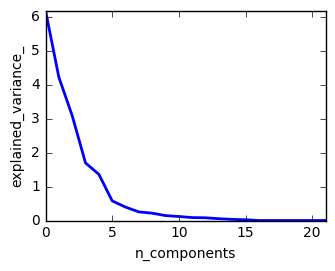

In [4]:
homeTatics = trainTest[:,[3,4,5,6,7,8,9,10,11,12,13,25,26,27,28,29,30,31,32,33,34,35]]
plotPCASpectrum(homeTatics)

#### Plot PCA Expectrum for team rating (One Team)

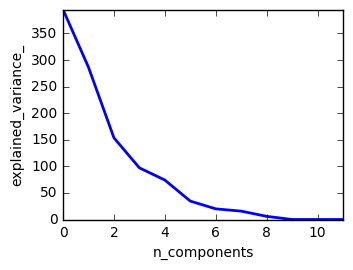

In [5]:
homeRateTeam = trainTest[:,[47,48,49,50,51,52,53,54,55,56,57,58]]
plotPCASpectrum(homeRateTeam)

#### Mounting of dataset

In [6]:
homeTatics = trainTest[:,[3,4,5,6,7,8,9,10,11,12,13,25,26,27,28,29,30,31,32,33,34,35]]
awayTatics = trainTest[:,[14,15,16,17,18,19,20,21,22,23,24,36,37,38,39,40,41,42,43,44,45,46]]

pca = decomposition.PCA(n_components=5)
homeTaticspreprocessed = pca.fit_transform(homeTatics)

pca = decomposition.PCA(n_components=5)
awayTaticspreprocessed = pca.fit_transform(awayTatics)

#### Reducing Dimensionality for team ratings

In [7]:
homeRateTeam = trainTest[:,[47,48,49,50,51,52,53,54,55,56,57,58]]
awayRateTeam = trainTest[:,[59,60,61,62,63,64,65,66,67,68,69,70]]

pca = decomposition.PCA(n_components=6)
homeRateTeamPreprocessed = pca.fit_transform(homeRateTeam)

pca = decomposition.PCA(n_components=6)
awayRateTeampreprocessed = pca.fit_transform(awayRateTeam)

#### Maximize sparse teams

In [8]:
enc = preprocessing.OneHotEncoder()
enc.fit(trainTest[:,[0]])
teamsH = enc.transform(trainTest[:,[0]]) 
teamsA = enc.transform(trainTest[:,[1]]) 
teams = (teamsH + teamsA).toarray()

#### Concatenate inputs

In [9]:
date = trainTest[:,[2]]
inputs = np.concatenate((date,homeTaticspreprocessed,awayTaticspreprocessed,homeRateTeamPreprocessed,awayRateTeampreprocessed,teams), axis=1)


#### Scaling inputs

In [10]:
inputs = StandardScaler().fit_transform(inputs)

## Classification 

#### Using KFold with Naive Bayes

In [11]:
resultSVM = KFoldNB(inputs,outputs)

Naive Bayes: = Score:4.46e-01[+/- 6.59e-02]


#### Using KFold with SVM

In [12]:
clf = svm.SVC()
np.mean(cross_val_score(clf,inputs,outputs,cv=10))

0.52613575268817203

#### Using KFold with Logistic Regression

In [13]:
clf = LogisticRegression(penalty='l1')
np.mean(cross_val_score(clf,inputs,outputs,cv=10))

0.51323924731182802

#### Using KFold with KNeighborsClassifier

In [14]:
clf = KNeighborsClassifier(n_neighbors=15)
np.mean(cross_val_score(clf,inputs,outputs,cv=10))

0.51622983870967742

#### Transforming the labels of outputs to MLP

In [98]:
outputs = preprocessing.LabelBinarizer().fit_transform(outputs)

#### Using KFold with MLP

In [114]:
clf = MLPClassifier(activation='tanh', solver='sgd', learning_rate='constant', 
	learning_rate_init=0.1, validation_fraction=0.2, hidden_layer_sizes=(20), shuffle=True,
	max_iter=5000, early_stopping=False, tol=0.000001, batch_size='auto',  warm_start=False)
np.mean(cross_val_score(clf,inputs,outputs,cv=10))

0.33322580645161293